In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('datasets/Restaurant_reviews.tsv' , delimiter= '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
import re                         
import nltk                       
# un comment nltk.download('stopwords') if you're running for the first time
#nltk.download('stopwords')         # Download stopwords from nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []                       

# Iterating through all the reviews
for i in range(0,1000):
    # Removing unnecessary punctuations and numbers except letters and replacing removed words with space.
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # converting review to lowercase
    review = review.lower()
    # Converting review to list(of Strings)
    review  = review.split()
    ps = PorterStemmer()
    words = stopwords.words('english')
    words.remove('not')
    words.remove('but')
    words.remove('is')
    # Loop through all words and keep those which are not in stopwords list.
    # set is much faster than a list and is considered when the review is very large eg. an article,a book
    review = [ps.stem(word) for word in review if not word in set(words)]
    # Joining back the review list to a string with each word seperated by a space.
    review = ' '.join(review)
    corpus.append(review)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features= 1566)                
X = cv.fit_transform(corpus).toarray()                 # toarray() is used to convert into matrix
y = dataset.iloc[:,1].values

In [10]:
X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 25)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=560)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [14]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})
results[1:20]

,Actual,Predicted
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,0,0


Accuracy Score:  0.88


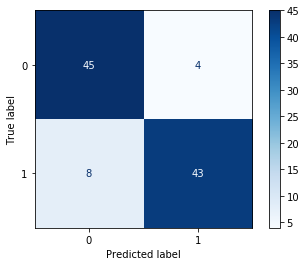

In [17]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(clf,X_test , y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: ',accuracy)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        49
           1       0.91      0.84      0.88        51

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

